<a href="https://colab.research.google.com/github/dphi-official/Deep_Learning_Bootcamp/blob/master/Digital%20Image%20Processing/Digital_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author:** [Banu Prakash Reddy](https://www.linkedin.com/in/banu-prakash/)

Images used in this notebook can be found here: https://github.com/dphi-official/Deep_Learning_Bootcamp/tree/master/Digital%20Image%20Processing/images

**Digital Image**

(Grayscale) It is a representation of a two dimensional image as a finite set of digital values, called picture elements or pixels

Image Source: Digital Image Processing”, Rafael C.
Gonzalez & Richard E. Woods,
Addison-Wesley, 2002

![picture 1](https://github.com/dphi-official/Deep_Learning_Bootcamp/blob/master/Digital%20Image%20Processing/images/Picture1.png?raw=true)

**italicized textPixel**

These are the elements of a digital image and they typically represent gray levels, colours, heights, opacities etc

![picture 2](https://github.com/dphi-official/Deep_Learning_Bootcamp/blob/master/Digital%20Image%20Processing/images/picture2.PNG?raw=true)

A digital image can be written as a function
 
 ***f(x, y) = i(x,y) * r(x,y)***

f(x, y): Intensity at given point (x, y)

i(x, y): Illumination at (x, y)

r(x, y): Reflectance/ Transmissivity at (x, y)

As we deal with vectors it is good to represent the data in the form of matrices.

Digitization implies that a digital image is an approximation of a real scene.






**Digital Image Processing**

It is processing/ performing multiple operations these digital images with the help of a computer.

Some major tasks: 

- Improvement of pictorial information for human interpretation

- Processing of image data for storage, transmission and representation for autonomous machine perception

It is mainly divided into

*Low-level:* Inputs and outputs are images (Ex: Noise Removal, Image Sharpening)

*Mid-level:* Outputs are the attributes extracted from input images (Ex: Object Recognition, Image Segmentation)

*High-level:* An ensemble of recognition of individual objects (Ex: Scene Understanding, Autonomous Navigation)

Let's Explore the same using Python and OpenCV

In [ ]:
# Import Statements
!pip install opencv-python

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

# uploading a file into colab working directory 
# file was downloaded from - https://upload.wikimedia.org/wikipedia/commons/4/43/F._C._Ki%C3%A6rskou_-_Coastal_scenery_with_a_farm_and_ships_at_the_sea.jpg

Saving Coastal_scenery_with_a_farm_and_ships_at_the_sea.jpg to Coastal_scenery_with_a_farm_and_ships_at_the_sea.jpg


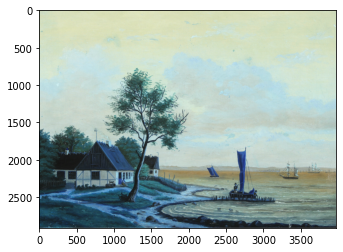

In [ ]:
# read an image
img = cv2.imread('Coastal_scenery_with_a_farm_and_ships_at_the_sea.jpg')
# Let's see how the image looks like
plt.imshow(img)

In [ ]:
# This is a 3-d array of pixel color info, in BGR format
print(img)
print("Image Properties")
print("- Number of Pixels: " + str(img.size))
print("- Shape/Dimensions: " + str(img.shape))

[[[213 219 184]
  [209 215 180]
  [209 215 180]
  ...
  [207 221 187]
  [208 222 188]
  [208 221 189]]

 [[211 217 182]
  [209 215 180]
  [210 216 181]
  ...
  [207 221 187]
  [208 222 188]
  [209 222 190]]

 [[213 220 185]
  [213 220 185]
  [215 222 187]
  ...
  [206 219 187]
  [209 222 190]
  [208 223 191]]

 ...

 [[ 30  59  74]
  [ 31  60  75]
  [ 31  60  75]
  ...
  [ 29  31  32]
  [ 30  32  33]
  [ 30  32  33]]

 [[ 85 103 114]
  [ 86 104 115]
  [ 86 104 115]
  ...
  [ 78  80  80]
  [ 79  81  81]
  [ 79  81  81]]

 [[224 236 246]
  [226 238 248]
  [226 238 248]
  ...
  [238 240 240]
  [238 240 240]
  [238 240 240]]]
Image Properties
- Number of Pixels: 34708128
- Shape/Dimensions: (2912, 3973, 3)


#### Let's play with colours 
1. change *blue to red* and *red to blue*
2. change to grayscale

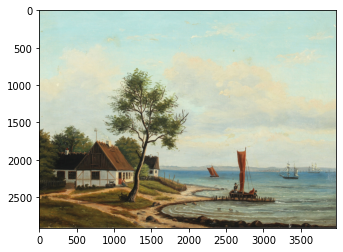

In [ ]:
# convert image to RGB color for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show image with matplotlib
plt.imshow(img)

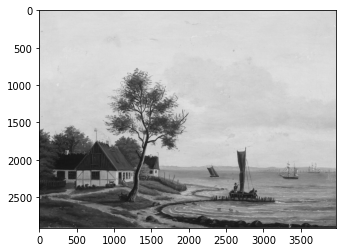

In [ ]:
# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# have to convert grayscale back to RGB for plt.imshow(), since plt.imshow expects a 3d array
# try plotting the same directly with gray_img and see the result for yourself 
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB))

In [ ]:
# grayscale image represented as a 2-d array, no need of BGR colour channels
print(gray_img)

[[213 209 209 ... 213 214 213]
 [211 209 210 ... 213 214 214]
 [214 214 216 ... 211 214 215]
 ...
 [ 52  53  53 ...  31  32  32]
 [ 99 100 100 ...  79  80  80]
 [234 236 236 ... 239 239 239]]


### Let's find the mean/average colour of the image

In [ ]:
# finding  the average per row of img
# np.average() takes in an axis argument which finds the average across that axis.(axis=0)
average_color_per_row = np.average(img, axis=0)

# find average across average per row
average_color = np.average(average_color_per_row, axis=0)

# convert back to uint8
average_color = np.uint8(average_color)
print(average_color)

[168 175 155]


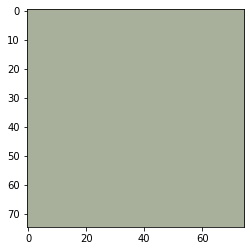

In [ ]:
# create 75 x 75 pixel array with average color value
average_color_img = np.array([[average_color]*75]*75, np.uint8)

plt.imshow(average_color_img)

Let's look at another image and perform some basic operations like gradient operaton


> An image gradient is a directional change in the intensity or color in an image.




In [ ]:
from google.colab import files
uploaded = files.upload()

# uploading a file into colab working directory 
# file was downloaded from - https://upload.wikimedia.org/wikipedia/commons/1/14/Brad_Pitt_%2815570818296%29.jpg

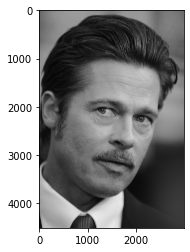

In [ ]:
#Read Image in GrayScale by setting 0 in the arguments
img_gray = cv2.imread('brad_pitt.jpg',0)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB))

In [ ]:
# assigning height and width from img_gray.shape
h,w = img_gray.shape[:2]
print(h, w)

4504 2988


In [ ]:
grad_img = np.asarray(img_gray)
# 2-d array
print(grad_img)

[[ 97  97  97 ... 100 104 106]
 [ 98 100 102 ... 101 104 106]
 [ 97  99 100 ... 104 104 103]
 ...
 [ 13  13  14 ...  52  52  52]
 [ 13  13  13 ...  53  53  52]
 [ 14  15  14 ...  53  53  51]]


In [ ]:
#applying gradient - subtracting the next pixel from the current pixel
for i in range(0,h):
  # traversing across height
  for j in range(0,w-1):
  # traversing across width
    min_pix_val = min(img_gray[i][j+1], img_gray[i][j])
    if min_pix_val == img_gray[i][j+1]:
      temp_arr = img_gray[i][j] - img_gray[i][j+1]
    else:
      temp_arr = img_gray[i][j+1] - img_gray[i][j]  
    grad_img[i,j] = temp_arr

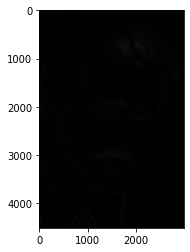

In [ ]:
#we can use pillow package
from PIL import Image
gradient_img = Image.fromarray(grad_img)
# Cmap='gray' -> converts to gray scale directly
plt.imshow(gradient_img, cmap='gray')

Negatives

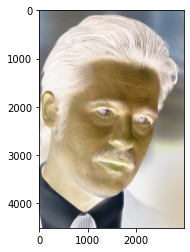

In [ ]:
img = cv2.imread('brad_pitt.jpg')
B,G,R = cv2.split(img)
B[:] = [255-x for x in B]     #inverting blue
G[:] = [255-x for x in G]     #inverting green    
R[:] = [255-x for x in R]     #inverting red

#saving image
neg_img = cv2.merge((B, G, R)) 
plt.imshow(neg_img)

**Thresholding**


> Binary Thresholding: Let's say we wish to convert an image into a binary image i.e. assign a pixel either a value of 0 or 1. To do this, we can perform thresholding. For instance, if the Threshold (T) value is 60, then all pixels with values greater than 60 would be assigned a value of 1, and all pixels with values lesser than or equal to that would be assigned a value of 0.



In [ ]:
from google.colab import files
uploaded = files.upload()

# uploading a file into colab working directory 
# file was downloaded from - https://upload.wikimedia.org/wikipedia/commons/0/0d/Upstate_New_York_Fall_Colors_-_Autumn_at_Church_Pond%2C_Paul_Smiths_%2830273943696%29.jpg

Saving upstate-ny.jpg to upstate-ny.jpg


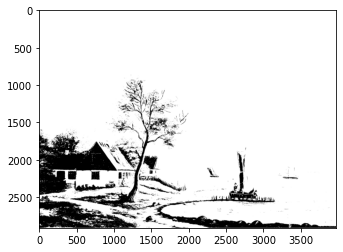

In [ ]:
# threshold for grayscale image from the scenery pic
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)

threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
# plt.figure(figsize=(10,10))
plt.imshow(threshold_img)

## Experiment with multiple numbers

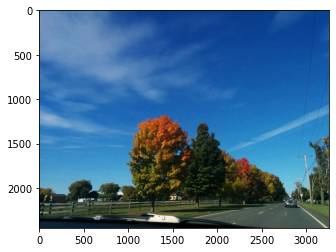

In [ ]:
## Let's see how we can use this in noise removal

# let us set some threshold for hue channel in blue range
blue_min = np.array([85, 60, 60], np.uint8)
blue_max = np.array([150, 255, 255], np.uint8)

upstate = cv2.imread('upstate-ny.jpg')
# Hue, Saturation, and Value (HSV) is a color model that is often used in place of the RGB color model in graphics and paint programs. 
# In using this color model, a color is specified then white or black is added to easily make color adjustments. 
upstate_hsv = cv2.cvtColor(upstate, cv2.COLOR_BGR2HSV)

plt.imshow(cv2.cvtColor(upstate_hsv, cv2.COLOR_HSV2RGB))

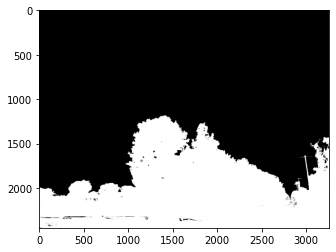

In [ ]:
mask_inverse = cv2.inRange(upstate_hsv, blue_min, blue_max)
mask = cv2.bitwise_not(mask_inverse)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))

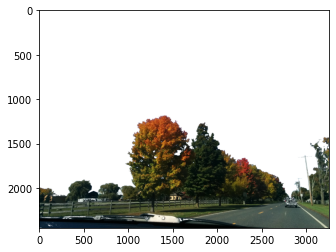

In [ ]:
# convert single channel mask back into 3 channels
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

# perform bitwise and on mask to obtain cut-out image that is not blue
masked_upstate = cv2.bitwise_and(upstate, mask_rgb)

# replace the cut-out parts with white
masked_replace_white = cv2.addWeighted(masked_upstate, 1, \
                                       cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)

plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))

**Segmentation**

Gaussian Blur

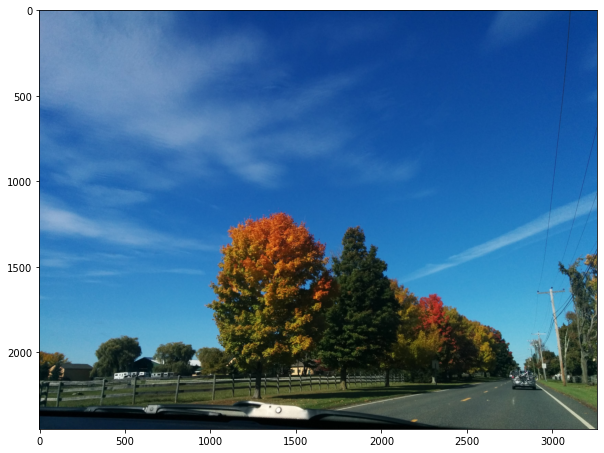

In [ ]:
# preproccess with blurring, with 5x5 kernel
img_blur_small = cv2.GaussianBlur(upstate, (5,5), 0)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2RGB))

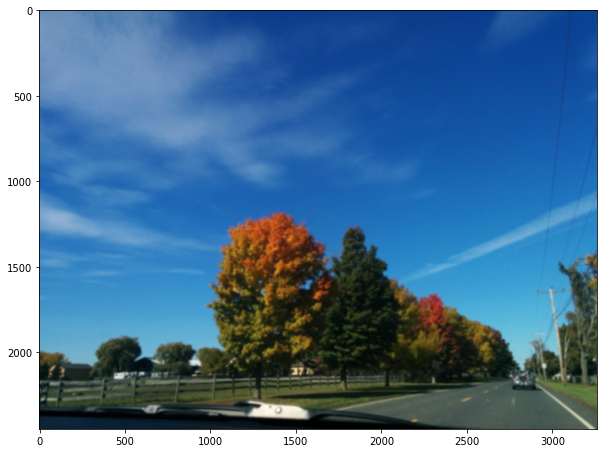

In [ ]:
img_blur_small = cv2.GaussianBlur(upstate, (25,25), 0)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2RGB))

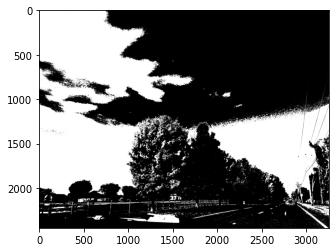

In [ ]:
# threshold on regular image
gray_img = cv2.cvtColor(upstate, cv2.COLOR_BGR2GRAY)
_, threshold_img = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB))

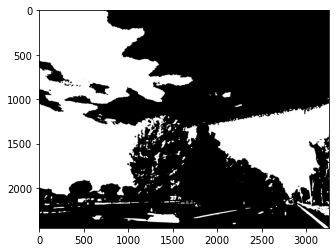

In [ ]:
#threshold on blurred image
gray_blur_img = cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2GRAY)
_, threshold_img_blur = cv2.threshold(gray_blur_img, 100, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(threshold_img_blur, cv2.COLOR_GRAY2RGB))

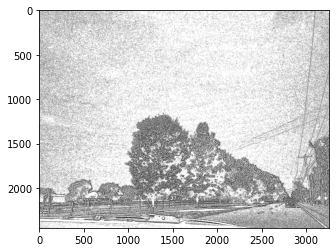

In [ ]:
# using adaptive threshold instead of global
adaptive_thresh = cv2.adaptiveThreshold(gray_img,255,\
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                                         cv2.THRESH_BINARY,11,2)
plt.imshow(cv2.cvtColor(adaptive_thresh, cv2.COLOR_GRAY2RGB))

In [ ]:
# we can use this concept of blurring in the segmentation
uploaded = files.upload()

Saving coins.jpg to coins.jpg


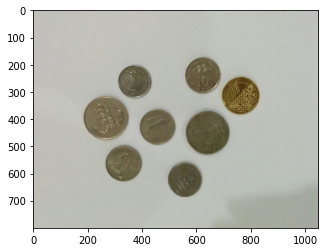

In [ ]:
coins = cv2.imread('coins.jpg')
plt.imshow(cv2.cvtColor(coins, cv2.COLOR_BGR2RGB))

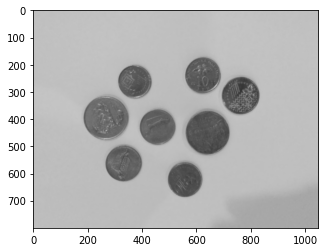

In [ ]:
# get binary image and apply Gaussian blur
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_preprocessed = cv2.GaussianBlur(coins_gray, (5, 5), 0)
plt.imshow(cv2.cvtColor(coins_preprocessed, cv2.COLOR_GRAY2RGB))

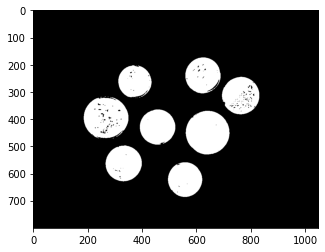

In [ ]:
_, coins_binary = cv2.threshold(coins_preprocessed, 130, 255, cv2.THRESH_BINARY)

# invert image to get coins
coins_binary = cv2.bitwise_not(coins_binary)
plt.imshow(cv2.cvtColor(coins_binary, cv2.COLOR_GRAY2RGB))

Morphology -> Erosion

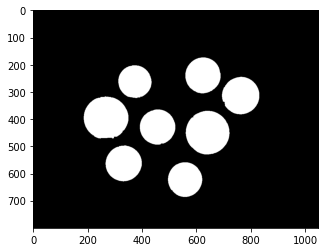

In [ ]:
# morph coins by eroding and dilating to remove noise
morph_kernel = np.ones((15,15),np.uint8)
coins_morph = cv2.morphologyEx(coins_binary, cv2.MORPH_CLOSE, morph_kernel)

plt.imshow(cv2.cvtColor(coins_morph, cv2.COLOR_GRAY2RGB))

number of coins:  8


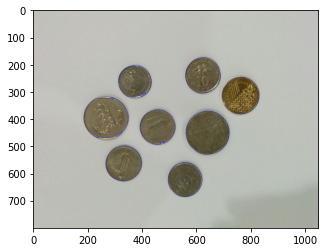

In [ ]:
# find contours
coins_contours, _ = cv2.findContours(coins_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# make copy of image
coins_and_contours = np.copy(coins)

# find contours of large enough area
min_coin_area = 60
large_contours = [cnt for cnt in coins_contours if cv2.contourArea(cnt) > min_coin_area]

# draw contours
cv2.drawContours(coins_and_contours, large_contours, -1, (255,0,0))

plt.imshow(cv2.cvtColor(coins_and_contours, cv2.COLOR_BGR2RGB))

# print number of contours
print('Number of coins: ', len(large_contours))

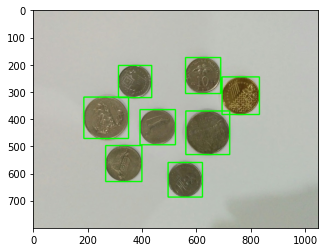

In [ ]:
# create copy of image to draw bounding boxes
bounding_img = np.copy(coins)

# for each contour find bounding box and draw rectangle
for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(bounding_img, cv2.COLOR_BGR2RGB))

Histogram - Equalization

In [ ]:
#Read Image in GrayScale by setting 0 in the arguments
img_gray = cv2.imread('brad_pitt.jpg',0)
height,width = img_gray.shape[:2]        
N = height * width                  

In [ ]:
#Initialize intensity values with 256 zeroes
intensity_count = [0] * 256   
high_contrast = np.zeros(img_gray.shape)

In [ ]:
#Find pixels count for each intensity
for i in range(0,height):
  for j in range(0,width):
    intensity_count[img_gray[i][j]] += 1

In [ ]:
L = 256
intensity_count,total_values_used = np.histogram(img.flatten(),L,[0,L])      
# Calculating Probability density function -> based on frequency/count
pdf_list = np.ceil(intensity_count*(L-1)/img.size)
# Calculating Cumulative distribution function 
cdf_list = pdf_list.cumsum() 

In [ ]:
#Apply the new intensities in our new image
for y in range(0, height):
  for x in range(0, width): 
    high_contrast[y,x] = cdf_list[img_gray[y,x]] 

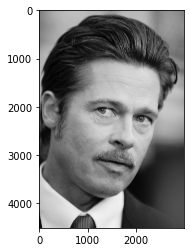

In [ ]:
# this is much sharper image
plt.imshow(high_contrast, cmap='gray')

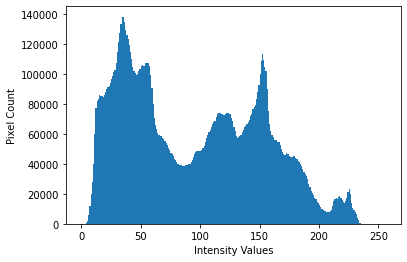

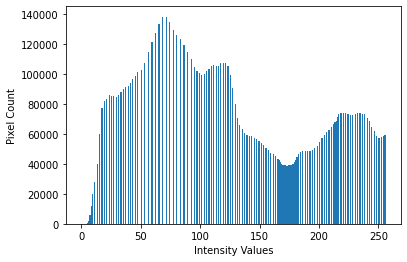

In [ ]:
plt.hist(img_gray.ravel(),256,[0,256])
plt.xlabel('Intensity Values')
plt.ylabel('Pixel Count')
plt.show()

plt.hist(high_contrast.ravel(),256,[0,256])	
plt.xlabel('Intensity Values')
plt.ylabel('Pixel Count')
plt.show()

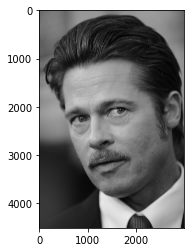

In [ ]:
# Horizontal flip

flip_img = cv2.flip(img_gray, 1)
plt.imshow(flip_img, cmap='gray')

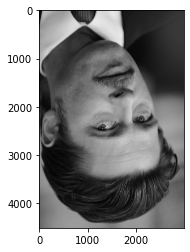

In [ ]:
# Vertical
flip_img = cv2.flip(img_gray, 0)
plt.imshow(flip_img, cmap='gray')

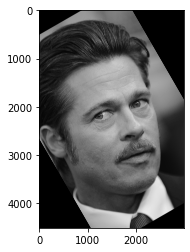

In [ ]:
h, w = img_gray.shape
M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), 30, 1)
rotated_img = cv2.warpAffine(img_gray, M, (w, h))
plt.imshow(rotated_img, cmap='gray')

**Image Comparison**

In images we generally use major metrics while comparing the similarity like:

MSE -> Mean Squared Error

SSIM -> Structural Similarity Index

SSIM attempts to model the perceived change in the structural information of the image, whereas MSE is actually estimating the perceived errors. There is a subtle difference between the two, but the results are dramatic. Unlike MSE, the SSIM value can vary between -1 and 1, where 1 indicates perfect similarity.

Pattern Intensity -> Squared differences between intensity values transformed by a function of type $ \frac{1}{1+x} $ and summed them up

Mutual Information

In [ ]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [ ]:
mse(rotated_img, img_gray)

6086.994350329084

In [ ]:
mse(flip_img, img_gray)

5063.2442870950945

In [ ]:
from skimage import measure

In [ ]:
print(measure.compare_ssim(rotated_img, img_gray))
print(measure.compare_ssim(flip_img, img_gray))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.


0.5204730278058163


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  


0.6155461659825363


These are some of the basic image processing operations that are shown. Most of the other operations are derived from these operations itself

Do explore others like filters, skeletonization, smoothing, image cuts, and other image augmentations like zooming, brightness, contrast.